In [4]:
!pip install sodapy
!pip install geopandas

In [112]:
# Snippet from: https://dev.socrata.com/foundry/data.cityofchicago.org/d62x-nvdr
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.

from_2020 = "qzdf-xmn8"
from_2019 = "w98m-zvie"
from_2018 = "3i3m-jwuy"
from_2017 = "d62x-nvdr"
crimes = client.get(from_2020, limit=500)

# Convert to pandas DataFrame
crimes_df = pd.DataFrame.from_records(crimes)

# Population of Chicago 2020 = 2694240 

In [5]:
import pandas as pd

In [167]:
data = pd.read_csv("C:\\Users\\Tony\\Downloads\\Crimes_-_2001_to_Present.csv")

C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [168]:
data2 = pd.read_csv("./below_poverty_level_by_community.csv")

In [169]:
df = df[df['Community Area'].notna()]
df['Month'] = df['Date'].apply(lambda x: int(x.split("/")[0]))
df['Day'] = df ['Date'].apply(lambda x: int(x.split("/")[1]))
print(df)
print(data)

               ID Case Number                    Date  \
63291    11665567    JC234307  04/10/2019 04:37:00 PM   
63376    11667963    JC235212  04/12/2019 04:08:00 PM   
63377    11667968    JC237058  04/19/2019 01:57:00 PM   
63453    11668309    JC238187  04/25/2019 05:20:00 PM   
63857    11692179    JC261724  05/13/2019 05:26:00 PM   
...           ...         ...                     ...   
7221318   9999999    HY189683  03/18/2015 05:08:00 PM   
7221319  11700037    JC278815  05/26/2019 12:10:00 AM   
7221321  11700926    JC279725  05/26/2019 05:13:00 PM   
7221322     24560    JC279072  05/26/2019 06:48:00 AM   
7221325     24559    JC278908  05/26/2019 02:11:00 AM   

                                       Block  IUCR  \
63291                     102XX S VERNON AVE  1562   
63376                     032XX N KEELER AVE  1754   
63377                    002XX N LARAMIE AVE  1752   
63453    108XX S DR MARTIN LUTHER KING JR DR  0486   
63857                     090XX S RACINE AVE 

In [176]:
# 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT','BATTERY', 'ASSAULT', 'ROBBERY', 'ARSON', 
violent_crime = ['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT','BATTERY', 'ASSAULT']
df['Violent'] = df['Primary Type'].apply(lambda x: x in violent_crime)


In [226]:
data['Month'] = data['Date'].apply(lambda x: int(x.split("/")[0]))
data['Day'] = data ['Date'].apply(lambda x: int(x.split("/")[1]))
violent_crime = ['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT','BATTERY', 'ASSAULT']
data['Violent'] = data['Primary Type'].apply(lambda x: x in violent_crime)


for i in range(1, 77):
    total_in_area = data2[data2['Community Area Number'] == i]
    print(total_in_area['Community Area Number'].value_counts().tolist())


In [178]:
import pandas as pd
import osgeo
import geopandas as gpd
import numpy as np



chicago_areas = gpd.read_file("./Boundaries - Community Areas (current)/geo_export_9cce659e-5ccf-4293-b615-10de388a3d8a.shp")
chicago_areas = chicago_areas[['area_numbe', 'geometry']]
chicago_areas.rename(columns = {"area_numbe": "Community Area Number"}, inplace = True)




In [187]:
chicago_areas['Hardship'] = data2['HARDSHIP INDEX']
print(chicago_areas['Hardship'])

0     39.0
1     46.0
2     20.0
3     17.0
4      6.0
      ... 
72    48.0
73    16.0
74    30.0
75    24.0
76    19.0
Name: Hardship, Length: 77, dtype: float64


In [180]:
max(area_total)

120688

Text(0.5, 1.0, 'Chicago Community Areas Hardship Index 2008-2012')

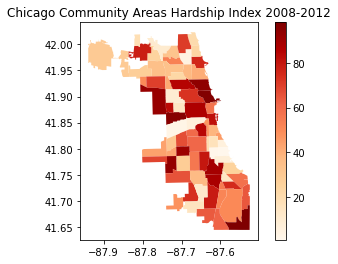

In [181]:
chicago_areas.plot(column = "Hardship", cmap = "OrRd", legend = True)
plt.title('Chicago Community Areas Hardship Index 2008-2012')

Text(0.5, 1.0, 'Total Non-Violent Crimes 2008-2012')

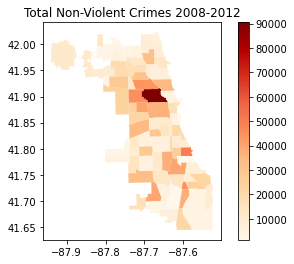

In [204]:
area_total = []

Yeardf = df.loc[(df['Year'] >= 2008) & (df['Year'] <= 2012)]
Yeardf = Yeardf[Yeardf['Violent'] == False]
area = Yeardf['Community Area'].unique()
for i in range(1, 78):
    if (i in area):
        total_in_area = Yeardf[Yeardf['Community Area'] == i] 
        area_total.append(int(total_in_area['Community Area'].value_counts()))
    else:
        area_total.append(0)
chicago_areas['Total Crimes'] = pd.DataFrame(np.array(area_total))

chicago_areas.plot(column = "Total Crimes", cmap = "OrRd", legend = True)
plt.title('Total Non-Violent Crimes 2008-2012')



In [19]:
print(df['Longitude'].min())

BBox = ((-87.7738,   -87.5658, 41.8096, 41.9653))

print(BBox)

-91.686565684
(-87.7738, -87.5658, 41.8096, 41.9653)


In [20]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [21]:
chicagoMap = plt.imread('D:\Classes\CSCE320\Project\ChicagoCrimeAnalysis\Location_map_Chicago.png')

fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(df['Longitude'],df['Latitude'], zorder=1, alpha=0.2,c='b',s=10)


ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])



ax.imshow(chicagoMap, zorder=0, extent = BBox, aspect= 'equal')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Classes\\CSCE320\\Project\\ChicagoCrimeAnalysis\\Location_map_Chicago.png'

[[ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... 39.  0.  0.]
 [ 0.  0.  0. ... 35.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [33.  0.  0. ...  0.  0.  0.]]


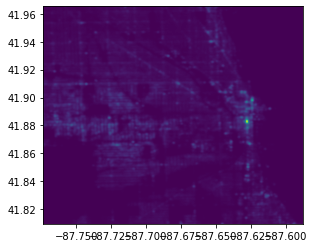

In [22]:

import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['Latitude']>41.8096]
df = df[df['Latitude']<41.9653]
df = df[df['Longitude']>-87.7738]
df = df[df['Longitude']<-87.5658]

y = df.loc[:, 'Latitude'].tolist()
x = df.loc[:, 'Longitude'].tolist()

heatmap, xedges, yedges = np.histogram2d(x,y,bins=1000)
print(heatmap)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=4)

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

               ID Case Number                    Date  \
63291    11665567    JC234307  04/10/2019 04:37:00 PM   
63376    11667963    JC235212  04/12/2019 04:08:00 PM   
63377    11667968    JC237058  04/19/2019 01:57:00 PM   
63453    11668309    JC238187  04/25/2019 05:20:00 PM   
63857    11692179    JC261724  05/13/2019 05:26:00 PM   
...           ...         ...                     ...   
7221318   9999999    HY189683  03/18/2015 05:08:00 PM   
7221319  11700037    JC278815  05/26/2019 12:10:00 AM   
7221321  11700926    JC279725  05/26/2019 05:13:00 PM   
7221322     24560    JC279072  05/26/2019 06:48:00 AM   
7221325     24559    JC278908  05/26/2019 02:11:00 AM   

                                       Block  IUCR  \
63291                     102XX S VERNON AVE  1562   
63376                     032XX N KEELER AVE  1754   
63377                    002XX N LARAMIE AVE  1752   
63453    108XX S DR MARTIN LUTHER KING JR DR  0486   
63857                     090XX S RACINE AVE 

In [95]:
opt =['All']
for i in range(2001,2021):
    opt.append(str(i))
    
types = ['All']
types += data['Primary Type'].value_counts().index.tolist()

optMonth = ['none']
optDay = ['none']
for i in range (1, 31):
    optDay.append(str(i))
    if (i < 13):
        optMonth.append(str(i))
    

In [192]:
typeDrop = widgets.Dropdown(
    options=types,
    value='All',
    description='Type:'
)

monthDrop = widgets.Dropdown (
    options= optMonth,
    value='none',
    description='Month:'
)

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)

drop2 = widgets.Dropdown(
    options=opt,
    value='2020',
    description='Year:'
)


yr1 = drop
month = monthDrop
cmpr = widgets.Checkbox(description='Compare')
yr2 = drop2
ui = widgets.HBox([typeDrop, month, yr1, cmpr,yr2])

def f(typeOf, month, year1, compare, year2):
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    dfYear = df[df['Year'] == int(year1)]
    title = ""
    if typeOf != 'All':
            dfYear = dfYear[dfYear['Primary Type'] == typeOf]
    if month != 'none':
            dfYear = dfYear[dfYear['Month'] == int(month)]
            title = month_names[int(month) - 1] + " "


    crime_types = dfYear['Primary Type'].value_counts().index.tolist()
    crime_types_count = dfYear['Primary Type'].value_counts()
    
    title += year1 + " Type of Crime"
    
    if compare == True:

        title = year1 + " vs. " + year2+" Type of Crime"
        dfYear2 = df[df['Year'] == int(year2)]
        
        if typeOf != 'All':
            dfYear2 = dfYear2[dfYear2['Primary Type'] == typeOf]
            
        crime_types2 = dfYear2['Primary Type'].value_counts().index.tolist()
        crime_types_count2 = dfYear2['Primary Type'].value_counts()
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(crime_types,crime_types_count,color = 'b',label=year1)
        ax.barh(crime_types2,crime_types_count2,color = 'r',label=year2)
#         ax.set_xticks(rotation=0)
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else:

        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(crime_types,crime_types_count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(crime_types_count):
            plt.text(value, index, str(value))
        plt.show()
    
#     if compare == True:
#         interact(f, year1=drop, compare=False,year2)

    
#interact(f, year=drop, compare=False)
out = widgets.interactive_output(f, {'typeOf': typeDrop, 'month': month, 'year1': yr1, 'compare' : cmpr, 'year2':yr2})


display(ui,out)

Output()

In [241]:

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)
drop2 = widgets.Dropdown(
    options=optMonth,
    value='none',
    description='Month:'
)
drop3 = widgets.Dropdown(
    options=['yes', 'no', 'both'],
    value='both',
    description='Violent Crimes:'
)
cmpr = widgets.Checkbox(description='Compare')
year = drop
month = drop2
violent = drop3
ui = widgets.HBox([year, month, violent,cmpr])

def f2(year, month, violent, compare):
    dfYear = data[data['Year'] == int(year)]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_names2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    if (violent == 'yes'):
        dfYear = dfYear[dfYear['Violent']]
    elif (violent == 'no'):
        dfYear = dfYear[dfYear['Violent'] == False]
 
    
    if (compare):     
        title = "comparison of total crime per month in " + year

        count = []
        dfViolent1 = dfYear[dfYear['Violent']]
        for i in range(1,13):
            dfMonth = dfViolent1[dfViolent1['Month'] == i]

    #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
            total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
            count.append(total_count)
        count2 = []
        dfViolent2 = dfYear[dfYear['Violent'] == False]
        for i in range(1,13):
            dfMonth = dfViolent2[dfViolent2['Month'] == i]

    #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
            total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
            count2.append(total_count)
        total = [x + y for x, y in zip(count, count2)]
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(month_names2,count2,color = 'grey',label="non-violent")
        for index, value in enumerate(count2):
            plt.text(value, index, str(np.round(value/total[index] * 100)))
        ax.barh(month_names,count,color = 'r',label="violent")
        for index, value in enumerate(count):
            plt.text(value, index, str(np.round(value/total[index] * 100)), color='w')
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else: 
        if (month == 'none') :
            count = []
            for i in range(1,13):
                dfMonth = dfYear[dfYear['Month'] == i]

        #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
                total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
                count.append(total_count)
            title = "total crime per month in " + year
            plt.figure(figsize=(8,7))
            plt.title(title)
            plt.barh(month_names,count)
            plt.xticks(rotation=0)
            plt.gca().invert_yaxis()
            for index, value in enumerate(count):
                plt.text(value, index, str(value))
            plt.show()
        else :
            dfMonth = dfYear[dfYear['Month'] == int(month)]
            bday = dfMonth['Day'].unique().max()
            count = []
            days = []
            for i in range(1, bday + 1):
                days.append(str(i))
                dfDay = dfMonth[dfMonth['Day'] == i]
                total_count = sum(dfDay['Primary Type'].value_counts().tolist())
                count.append(total_count)
            title = "total crime per day in " + month_names[int(month) - 1] + ", " +  year
            plt.figure(figsize=(10,12))
            plt.title(title)
            plt.barh(days,count)
            plt.xticks(rotation=0)
            plt.gca().invert_yaxis()
            for index, value in enumerate(count):
                plt.text(value, index, str(value))
            plt.show()

out = widgets.interactive_output(f2, {'year': year, 'month': month, 'violent': violent, 'compare': cmpr})
display(ui,out)


Output()

In [27]:
import pandas as pd
import osgeo
import geopandas as gpd

# chicago_areas = gpd.read_file("./Boundaries - Community Areas (current)/geo_export_9cce659e-5ccf-4293-b615-10de388a3d8a.shp")
# chicago_areas = chicago_areas[['area_numbe', 'geometry']]
# chicago_areas.rename(columns = {"area_numbe": "Community Area"}, inplace = True)



In [165]:

drop = widgets.Dropdown(
    options=opt,
    value='All',
    description='Year:'
)
drop3 = widgets.Dropdown(
    options=['yes', 'no', 'both'],
    value='both',
    description='Violent Crimes:'
)
year = drop
violent = drop3
ui = widgets.HBox([year, violent])
areas = df


def f3(year, violent):
    chicago_areas = gpd.read_file("./Boundaries - Community Areas (current)/geo_export_9cce659e-5ccf-4293-b615-10de388a3d8a.shp")
    chicago_areas = chicago_areas[['area_numbe', 'geometry']]
    chicago_areas.rename(columns = {"area_numbe": "Community Area"}, inplace = True)
    yearDf = df
    if (year != 'All'):
        yearDf = df[df['Year'] == int(year)]
    
    title = "total crime in "
    if (violent == 'yes'):
        yearDf = yearDf[yearDf['Violent'] == True]
        title = "violent crimes in "
    if (violent == 'no'):
        yearDf = yearDf[yearDf['Violent'] == False]
        title = "non-violent crimes in "
    title += year
#     print(yearDf)
    area_total = []
    area = yearDf['Community Area'].unique()
#     print (np.sort(area))
    for i in range(1, 78):
        if (i in area):
            total_in_area = yearDf[yearDf['Community Area'] == (i)] 
            area_total.append(int(total_in_area['Community Area'].value_counts()))
        else:
            area_total.append(0)
    chicago_areas['Total Crimes'] = pd.DataFrame(np.array(area_total))
    
    chicago_areas.plot(column = "Total Crimes", cmap = "Spectral", legend = True)
    plt.title(title)
    plt.figure(figsize=(10,7))
    
out = widgets.interactive_output(f3, {'year': year, 'violent': violent})
display(ui,out)

Output()